<a href="https://colab.research.google.com/github/Amar-Ag/EV_InfrastructureAnalysis-/blob/main/FinalProject_Revised_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the necessary libraries for doing my analysis and visualization

In [ ]:
# Importing all the necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Xlrd required for excel file read
!pip install --upgrade xlrd

#Can use bokeh to make interactive charts
from bokeh.io import push_notebook, show, output_notebook, output_file
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
output_notebook()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 1.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
#The notebook does not save the files permanently so please upload the attached excel file to the current time by using the left folder icon
df = pd.read_excel('CaloriesFinal.xlsx',sheet_name='Calories' )
df = df[3:]  # Accessing needed years and removing merged rows 
df['Year'] = pd.to_datetime(df['Year'].astype('int32'),format = '%Y') 
df = df.loc[df["Year"] >= '2000-1-1'] # Taking the year after 2000 as the other dataset correponds to the same  
df = df.reset_index() #Resetting the index to make the index correspond to current years
del df["index"]
df

,Year,"Meat, eggs, and nuts",Dairy,Fruit,Vegetables,Flour and cereal products**,Added fats and oils and dairy fats*,Sugar and sweeteners (Added),Total
0,2000-01-01,534.293555,237.225365,93.988707,146.431497,596.499286,537.0,415.378184,2560.816595
1,2001-01-01,529.984689,236.151347,91.634346,146.038221,583.996573,548.0,410.187045,2545.992222
2,2002-01-01,546.485868,237.221873,91.211683,141.153435,572.650978,577.0,407.738285,2573.462122
3,2003-01-01,546.584234,236.619341,91.744840,146.257979,575.439467,575.0,394.347321,2565.993183
4,2004-01-01,553.739256,238.361492,92.460273,142.892120,570.425810,573.0,394.890833,2565.769784
5,2005-01-01,546.137535,237.619199,90.245767,136.881125,571.473054,573.0,396.093309,2551.449988
6,2006-01-01,549.992517,237.331732,89.232801,138.666949,580.195344,571.0,386.841634,2553.260978
7,2007-01-01,548.038359,237.000179,88.645841,138.062247,589.291480,584.0,377.141889,2562.179995
8,2008-01-01,533.940533,234.188123,86.101508,130.967776,586.352449,594.0,377.734454,2543.284842
9,2009-01-01,527.169809,236.742262,84.232983,126.403719,580.375340,551.0,363.179269,2469.103384


In [ ]:
# Reading in the Diabetes worksheet data 
df2 = pd.read_excel('CaloriesFinal.xlsx',sheet_name='Diabetes' )
df2['Year'] = pd.to_datetime(df2['Year'].astype('int32'),format = '%Y')
df2 = df2.loc[df2["Year"] < '2018-1-1'] # Fitting data according to the year available 
df["DiabetesTotal"] = df2["Total - Percentage"]
#df

In [ ]:
# Reading in the Cardiovasucular diseases (CardioNew) worksheet data
df3 = pd.read_excel('CaloriesFinal.xlsx',sheet_name='CardioNew' )
df3['Year'] = pd.to_datetime(df3['Year'].astype('int32'),format = '%Y')
df3 = df3.loc[df3["Year"] < '2018-1-1'] # Fitting data according to the year available
df["CardioTotal"] = df3["CardioRate"]
df

,Year,"Meat, eggs, and nuts",Dairy,Fruit,Vegetables,Flour and cereal products**,Added fats and oils and dairy fats*,Sugar and sweeteners (Added),Total,DiabetesTotal,CardioTotal
0,2000-01-01,534.293555,237.225365,93.988707,146.431497,596.499286,537.0,415.378184,2560.816595,4.5,6.2
1,2001-01-01,529.984689,236.151347,91.634346,146.038221,583.996573,548.0,410.187045,2545.992222,4.8,6.1
2,2002-01-01,546.485868,237.221873,91.211683,141.153435,572.650978,577.0,407.738285,2573.462122,4.9,5.6
3,2003-01-01,546.584234,236.619341,91.744840,146.257979,575.439467,575.0,394.347321,2565.993183,4.9,5.8
4,2004-01-01,553.739256,238.361492,92.460273,142.892120,570.425810,573.0,394.890833,2565.769784,5.2,6.4
5,2005-01-01,546.137535,237.619199,90.245767,136.881125,571.473054,573.0,396.093309,2551.449988,5.5,6.2
6,2006-01-01,549.992517,237.331732,89.232801,138.666949,580.195344,571.0,386.841634,2553.260978,5.7,5.8
7,2007-01-01,548.038359,237.000179,88.645841,138.062247,589.291480,584.0,377.141889,2562.179995,5.6,6.4
8,2008-01-01,533.940533,234.188123,86.101508,130.967776,586.352449,594.0,377.734454,2543.284842,5.9,6.4
9,2009-01-01,527.169809,236.742262,84.232983,126.403719,580.375340,551.0,363.179269,2469.103384,6.4,6.3


In [ ]:
df.corr()

,"Meat, eggs, and nuts",Dairy,Fruit,Vegetables,Flour and cereal products**,Added fats and oils and dairy fats*,Sugar and sweeteners (Added),Total,DiabetesTotal,CardioTotal
"Meat, eggs, and nuts",1.000000,0.757291,0.512018,0.641706,0.383320,0.021694,0.425470,0.818169,-0.452976,-0.419681
Dairy,0.757291,1.000000,0.594346,0.620166,0.680894,-0.512193,0.637878,0.782148,-0.592713,-0.175786
Fruit,0.512018,0.594346,1.000000,0.868253,0.698588,-0.637760,0.940341,0.826484,-0.930870,0.026153
Vegetables,0.641706,0.620166,0.868253,1.000000,0.526691,-0.408700,0.835300,0.834661,-0.898226,-0.288168
Flour and cereal products**,0.383320,0.680894,0.698588,0.526691,1.000000,-0.766220,0.740709,0.767031,-0.665801,0.207447
Added fats and oils and dairy fats*,0.021694,-0.512193,-0.637760,-0.408700,-0.766220,1.000000,-0.722277,-0.387303,0.641759,-0.317287
Sugar and sweeteners (Added),0.425470,0.637878,0.940341,0.835300,0.740709,-0.722277,1.000000,0.806451,-0.962832,-0.016441
Total,0.818169,0.782148,0.826484,0.834661,0.767031,-0.387303,0.806451,1.000000,-0.798075,-0.187778
DiabetesTotal,-0.452976,-0.592713,-0.930870,-0.898226,-0.665801,0.641759,-0.962832,-0.798075,1.000000,0.051588
CardioTotal,-0.419681,-0.175786,0.026153,-0.288168,0.207447,-0.317287,-0.016441,-0.187778,0.051588,1.000000


<Figure size 800x600 with 0 Axes>

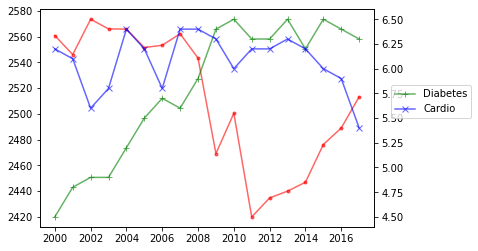

In [ ]:
# Plotting the raw data as they are against calories
plt.figure(figsize=(8,6),dpi=100)
fig,ax = plt.subplots()

ax.plot(df['Year'],df['Total'],marker='.', color='r', label= 'Total Calories', alpha=0.6)
ax2= ax.twinx()
ax2.plot(df['Year'],df['DiabetesTotal'], marker = '+', color = 'g',label = 'Diabetes',alpha=0.6)
ax2.plot(df['Year'],df['CardioTotal'], marker = 'x', color = 'b',label = 'Cardio',alpha=0.6)
plt.legend(loc=(1.05,0.5));


Text(0, 0.5, 'Percentage')

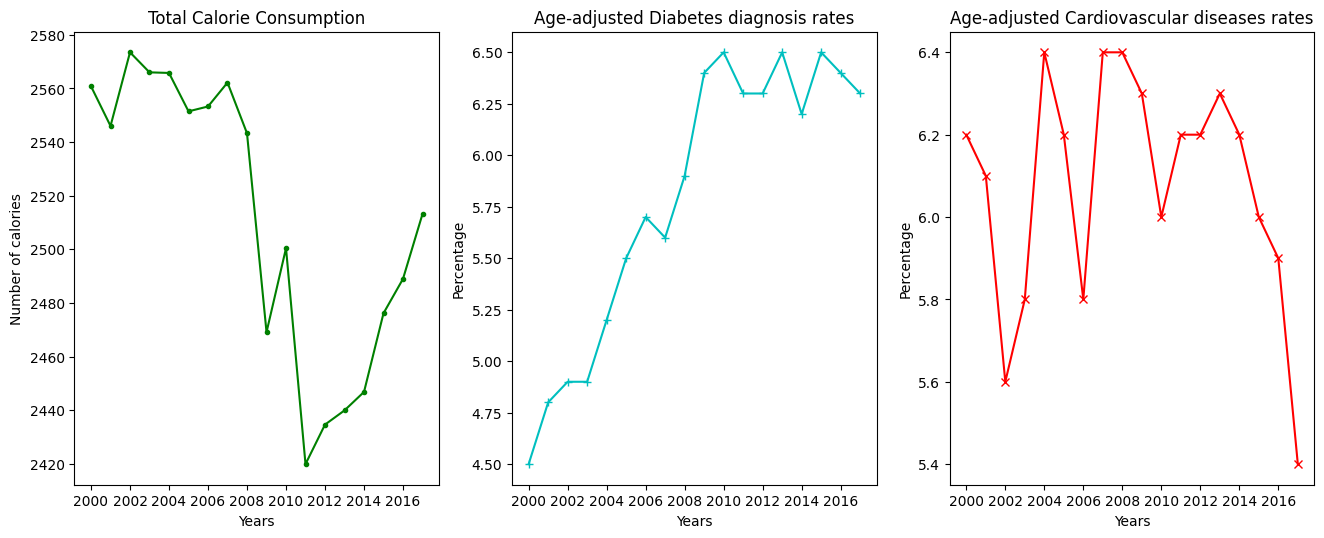

In [ ]:
# Plotting the raw data as they are against calories independently to understand trends clearly
fig,ax = plt.subplots(1,3,figsize=(16,6),dpi=100)
ax[0].plot(df['Year'],df['Total'],marker='.', color='g', label= 'Total Calories')
ax[0].set_title('Total Calorie Consumption')
ax[0].set_xlabel('Years')
ax[0].set_ylabel('Number of calories')

ax[1].plot(df['Year'],df['DiabetesTotal'], marker = '+', color = 'c',label = 'Diabetes')
ax[1].set_title('Age-adjusted Diabetes diagnosis rates')
ax[1].set_xlabel('Years')
ax[1].set_ylabel('Percentage')


ax[2].plot(df['Year'],df['CardioTotal'], marker = 'x', color = 'r',label = 'Cardio')
ax[2].set_title('Age-adjusted Cardiovascular diseases rates')
ax[2].set_xlabel('Years')
ax[2].set_ylabel('Percentage')

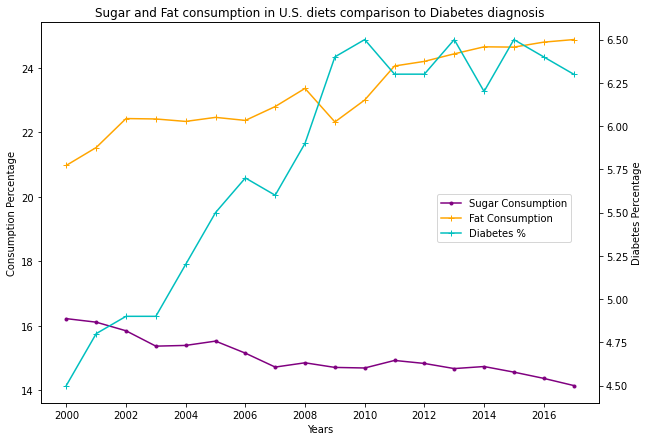

In [ ]:
# Actual comparisons drawn for the project for Diabetes
fig,ax = plt.subplots(figsize=(10,7))
ax.set_title('Sugar and Fat consumption in U.S. diets comparison to Diabetes diagnosis')

ax.plot(df['Year'],(df['Sugar and sweeteners (Added)']/df['Total'])*100,marker='.', color='purple', label= 'Sugar Consumption')
ax.plot(df['Year'],(df['Added fats and oils and dairy fats*']/df['Total'])*100, marker = '+', color = 'orange',label = 'Fat Consumption')
ax.set_xlabel('Years')
ax.set_ylabel('Consumption Percentage')

ax2= ax.twinx()
ax2.plot(df['Year'],df['DiabetesTotal'], marker = '+', color = 'c',label = 'Diabetes %')
ax2.set_ylabel('Diabetes Percentage')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(0.6, 0.5), loc='upper left')


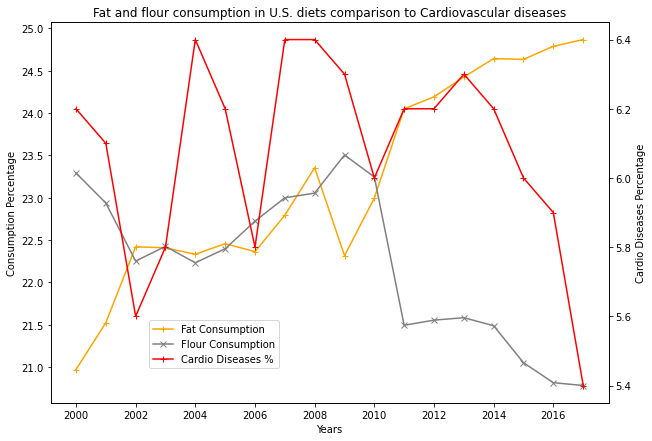

In [ ]:
# Actual comparisons drawn for the project for Cardiovascular diseases 
fig,ax = plt.subplots(figsize=(10,7))
ax.set_title('Fat and flour consumption in U.S. diets comparison to Cardiovascular diseases')

ax.plot(df['Year'],(df['Added fats and oils and dairy fats*']/df['Total'])*100, marker = '+', color = 'orange',label = 'Fat Consumption')
ax.plot(df['Year'],(df['Flour and cereal products**']/df['Total'])*100, marker = 'x', color = 'gray',label = 'Flour Consumption')
ax.set_xlabel('Years')
ax.set_ylabel('Consumption Percentage')

ax2= ax.twinx()
ax2.plot(df['Year'],df['CardioTotal'], marker = '+', color = 'r',label = 'Cardio Diseases %')
ax2.set_ylabel('Cardio Diseases Percentage')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(0.2, 0.25), loc='upper left')